In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
#loading the mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#splitting the validation data from the test data
#from sklearn.model_selection import train_test_split
#x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state=0)

#Data preprocessing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Reshaping it as per the requirement
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

#categorically encoding the y_train
y_train = keras.utils.to_categorical(y_train)
#y_valid = keras.utils.to_categorical(y_valid)
y_test = keras.utils.to_categorical(y_test)


In [4]:
#Defining the model
from keras import Sequential
from keras.layers import Conv2D , Dense , MaxPooling2D ,  Flatten
CNN_model = Sequential()
CNN_model.add(Conv2D(filters = 64 , kernel_size = 3 , strides =(1,1), padding = 'same', activation='relu',input_shape = [x_train.shape[1],x_train.shape[2],x_train.shape[3]]))
CNN_model.add(MaxPooling2D(pool_size=(3,3),strides = (2,2),padding='same'))
CNN_model.add(Conv2D(filters = 16 , kernel_size = 3 , strides =(1,1), padding = 'same', activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(3,3),strides = (2,2),padding='same'))
CNN_model.add(Conv2D(filters = 64 , kernel_size = 3 , strides =(1,1), padding = 'same', activation='relu'))

#adding the flattend and dense layer
CNN_model.add(Flatten())
CNN_model.add(Dense(units=32, activation = 'relu'))
#adding the output dense layer
CNN_model.add(Dense(units = 10, activation = 'softmax'))

#Configure the optimizer and compile the model
CNN_model.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.CategoricalCrossentropy(from_logits=False), metrics='accuracy')
CNN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        9232      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          9280      
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [5]:
#Train the model
history = CNN_model.fit(x_train, y_train, batch_size = 32 , epochs = 100 , verbose = 1, validation_split=0.2)

Epoch 1/2
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1627 - accuracy: 0.9485 - val_loss: 0.0567 - val_accuracy: 0.9836
Epoch 2/2
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0452 - val_accuracy: 0.9871


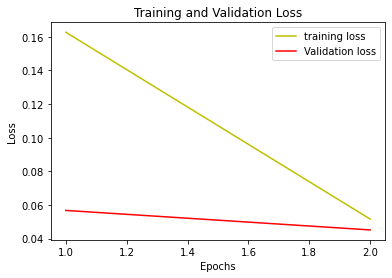

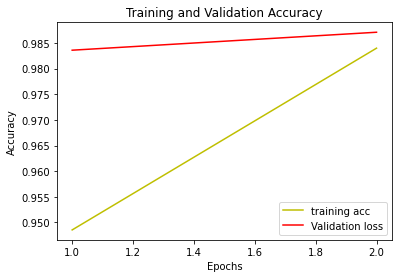

In [7]:
#Plotting
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()